# Doc2Vec

A continuation of using neural networks to help predict company embeddings, we now explore doc2vec.

This works much in the same was as Word2Vec, except on input we also specify which document/filing a given word has come from, resulting in ready made document vectors for us.

## Lets get to the code!

First we need to load in the functions and data:

In [1]:
import os
import json
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

df = pd.read_csv("../data/preprocessed.csv")

Thanks to the gensim package, it's quite easy to implement doc2vec.

In [2]:
from gensim.models import doc2vec
from collections import namedtuple

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(df["coDescription_stopwords"]):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

model = doc2vec.Doc2Vec(docs, vector_size = 100, window = 10, min_count = 1, workers = 4)

Like Word2Vec, we now also have a document vector matrix. We specified only 100 dimensions due to computational limitations, and the fact anymore most likely would not have helped. (Tune the hyper-parameter later)

And here we have the vectors for each company.

In [1]:
# Get the vectors

doc_vec_2 = pd.DataFrame([model.dv[doc] for doc in np.arange(0,len(docs))])
doc_vec_2.head()

NameError: name 'pd' is not defined

## Plotting the results

Here are the results of the doc2vec semantic company embedding after dimensionality reduction using PCA.

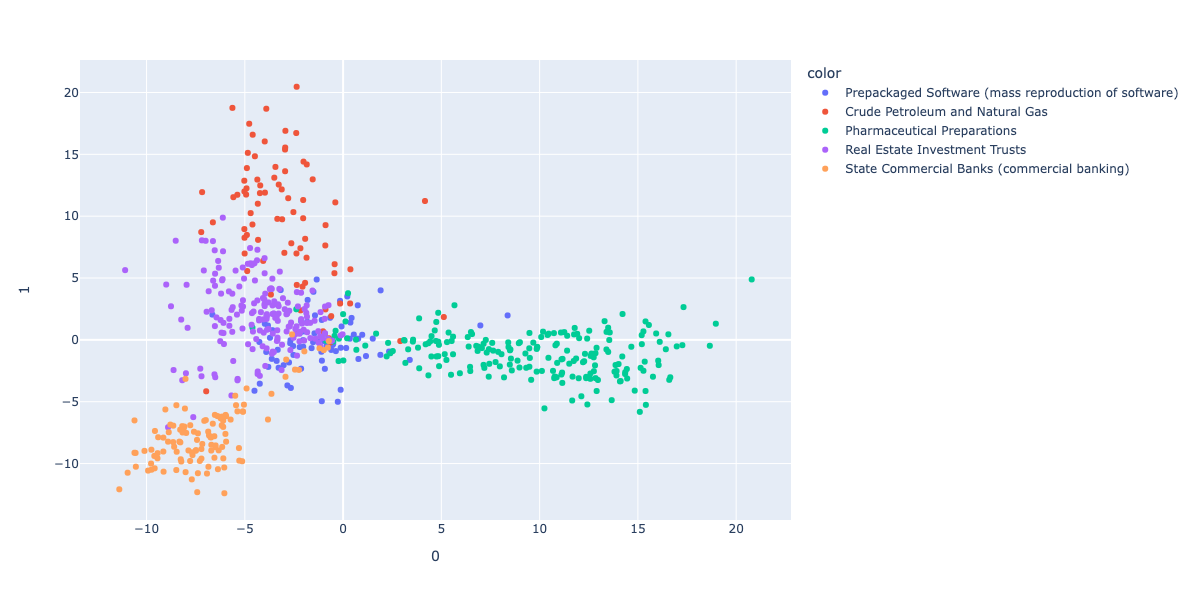

In [41]:
plot_pca = std_func.pca_visualize_2d(doc_vec_2, df.loc[:,["name","SIC_desc"]])

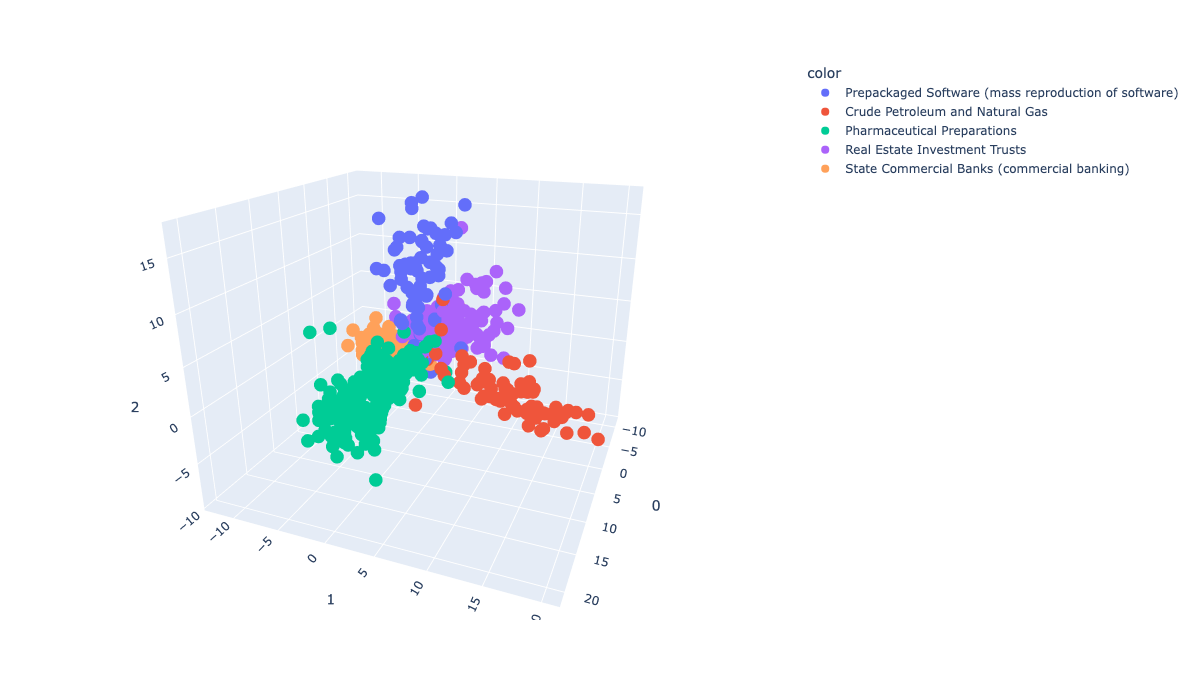

In [42]:
std_func.pca_visualize_3d(plot_pca)

These look great! It seems doc2vec was able to create embeddings for our companies that separated them by industry very well, even after the PCA dimensionality reduction.